# Problem Statement


**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# About the Dataset

**<h3>Attributes</h3>**

<h4>People</h4>

* **ID**: Customer's unique identifier
* **Year_Birth**: Customer's birth year
* **Education**: Customer's education level
* **Marital_Status**: Customer's marital status
* **Income**: Customer's yearly household income
* **Kidhome**: Number of children in customer's household
* **Teenhome**: Number of teenagers in customer's household
* **Dt_Customer**: Date of customer's enrollment with the company
* **Recency**: Number of days since customer's last purchase
* **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

<h4>Products</h4>

* **MntWines**: Amount spent on wine in last 2 years
* **MntFruits**: Amount spent on fruits in last 2 years
* **MntMeatProducts**: Amount spent on meat in last 2 years
* **MntFishProducts**: Amount spent on fish in last 2 years
* **MntSweetProducts**: Amount spent on sweets in last 2 years
* **MntGoldProds**: Amount spent on gold in last 2 years

<h4>Promotion</h4>

* **NumDealsPurchases**: Number of purchases made with a discount
* **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

<h4>Place</h4>

* **NumWebPurchases**: Number of purchases made through the company’s website
* **NumCatalogPurchases**: Number of purchases made using a catalogue
* **NumStorePurchases**: Number of purchases made directly in stores
* **NumWebVisitsMonth**: Number of visits to company’s website in the last month

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv("/content/data.csv",sep='\t')

In [3]:
df.head()   # Viewing first 5 rows of the dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape  # Checking the shape of the data

(2240, 29)

In [5]:
df.columns # Viewing Columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

There are some columns **Z_CostContact** and **Z_Revenue** which are not defined, So we will drop them.

In [6]:
df.info()  # Learning the dtypes of columns and how many non-null values there are in those columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i


***From above output we can see that***
*  ***There are missing values in "Income" Column***
*  ***Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime***
* ***There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.*** 





In [7]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])  # Changing dtype of Dt_Customer

In [8]:
df.describe().T  # Getting the statistical summary of dataset

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


***The above stats show some discrepancies in mean and max of Income.***

# Data Cleaning

In [9]:
df.isnull().sum()  # Checking if there are any null values in our Dataset

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can see that ,we have **24 missing values** in the **Income** column.

In [10]:
( df['Income'].isnull().sum() / df['Income'].shape )*100   # Checking percentage of Null Values in the "Income" column

array([1.07142857])

Since the **Income Column is continuous**, and ***Percentage of Null values*** *italicized text*in the Column is ***very low (1%)*** *italicized text*, Let us impute the Null values using **median**.

In [11]:
df["Income"].fillna(df["Income"].median(), inplace=True)

In [12]:
df.duplicated().sum()  # Checking if there are any duplicated values in our Dataset

0

***There is no duplicate, data seems clear so far.***

# Feature Engineering

***Creating new features out of exisitng columns :***


*  Extracting the **"Age"** of a customer by the "Year_Birth" indicating the birth year of the respective person.

*  Creating another feature **"Money_Spent"** indicating the total amount spent by the customer in various categories over the span of two years.

*  Creating another feature **"PurchaseNum"** indicating the total no. of purchases made by the customer in various categories over the span of two years

*  Creating a feature **"Children"** to indicate total children in a household that is, kids and teenagers.

*   Creating a feature **"Is_Parent"** to indicate parenthood status. 
* Creating a feature **"Total_Promos"** to get a sum of accepted promotions.

















In [13]:
df["Age"] = 2014 - df["Year_Birth"]

df["Money_Spent"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])

df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

Creating a feature **"Customer_For"** of the number of days the customers started to shop in the store relative to the last recorded date.

In [14]:
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)

df["Customer_For"] = days
df["Customer_For"] = df["Customer_For"].apply(lambda x : int((str(x).split(" "))[0]))

In [15]:
df["Marital_Status"].value_counts()  # Looking at different categories in Marital_Status

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

***Reducing the categories in Marital_Status to two categories :***


*  ***Single***
* ***Together***




In [16]:
df["Marital_Status"] = df["Marital_Status"].replace({"Married": "Together",
                                                     "Alone": "Single", "Absurd": "Single", "Divorced": "Single", "Widow": "Single", "Divorced": "Single", "YOLO": "Single"})

Creating a feature **"FamilySize"** to indicate total no. of people in an household.

In [17]:
df['FamilySize'] = np.nan

for i in range(0,df.shape[0]) :
  if df['Marital_Status'][i] == 'Together' :
      df["FamilySize"][i] = df["Children"][i] + 2
  else :
      df["FamilySize"][i] = df["Children"][i] + 1

In [18]:
df["Education"].value_counts()  #  Looking at different categories in Education

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

***Reducing the categories in Education to two categories :***


*  ***Undergraduate***
* ***Graduate***
* ***PostGraduate***





In [19]:
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                           "Graduation":"Graduate",
                                           "Master":"Postgraduate", "PhD":"Postgraduate"})

***Dropping redundant columns from dataset***

In [20]:
df.drop(["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"], axis=1, inplace=True)

# Exploratory Data Analysis

***To understand the data more clearly, Let us plot some graphs.***

***Visualizing the correlation between the some of the important variables using pairplot visualization.***

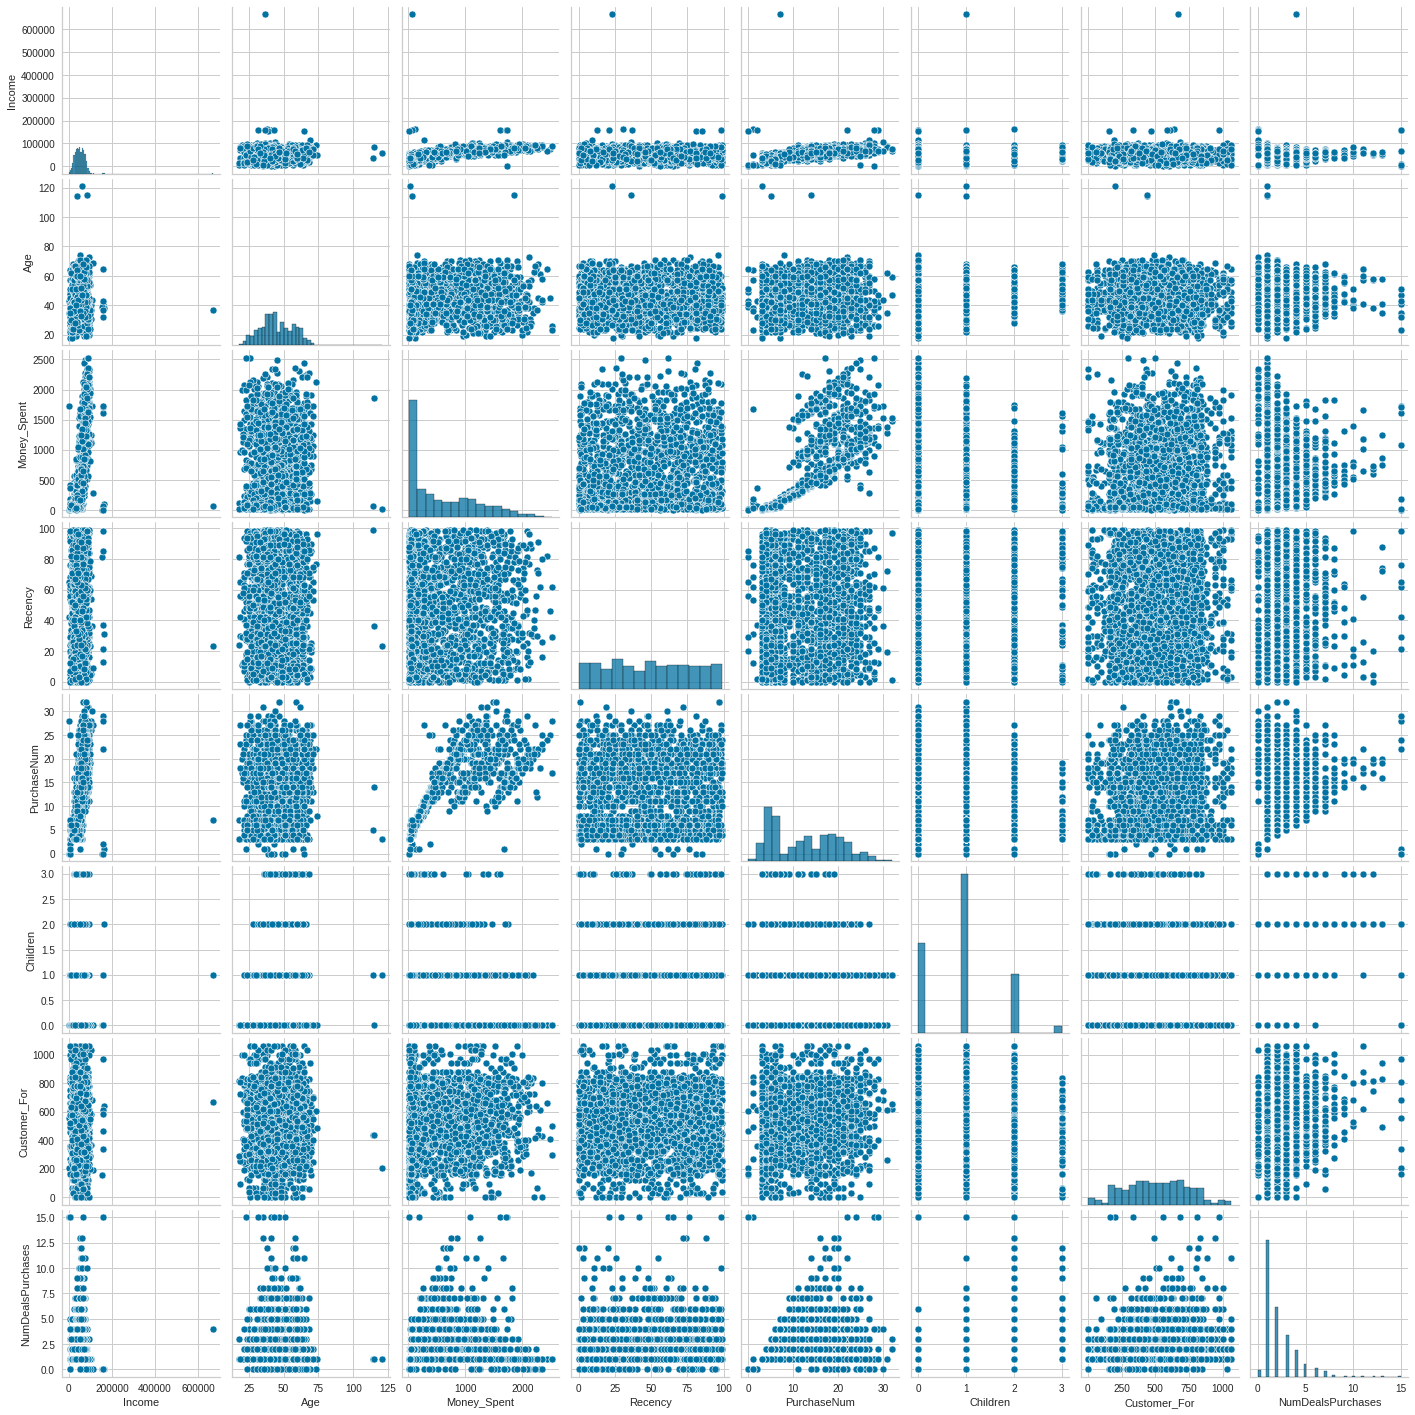

In [21]:
cols_to_plot = ["Income", "Age", "Money_Spent", "Recency", "PurchaseNum", "Children", "Customer_For","NumDealsPurchases"]

sns.pairplot(df[cols_to_plot]);

***We can see that, there are a few outliers in the Income and Age features. I am deleting the outliers in the data.***

In [22]:
df = df[df["Age"]< df['Age'].quantile(0.99)]
df= df[df["Income"]< df["Income"].quantile(0.99)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2189


***Plotting the Distribution of Each Variable***

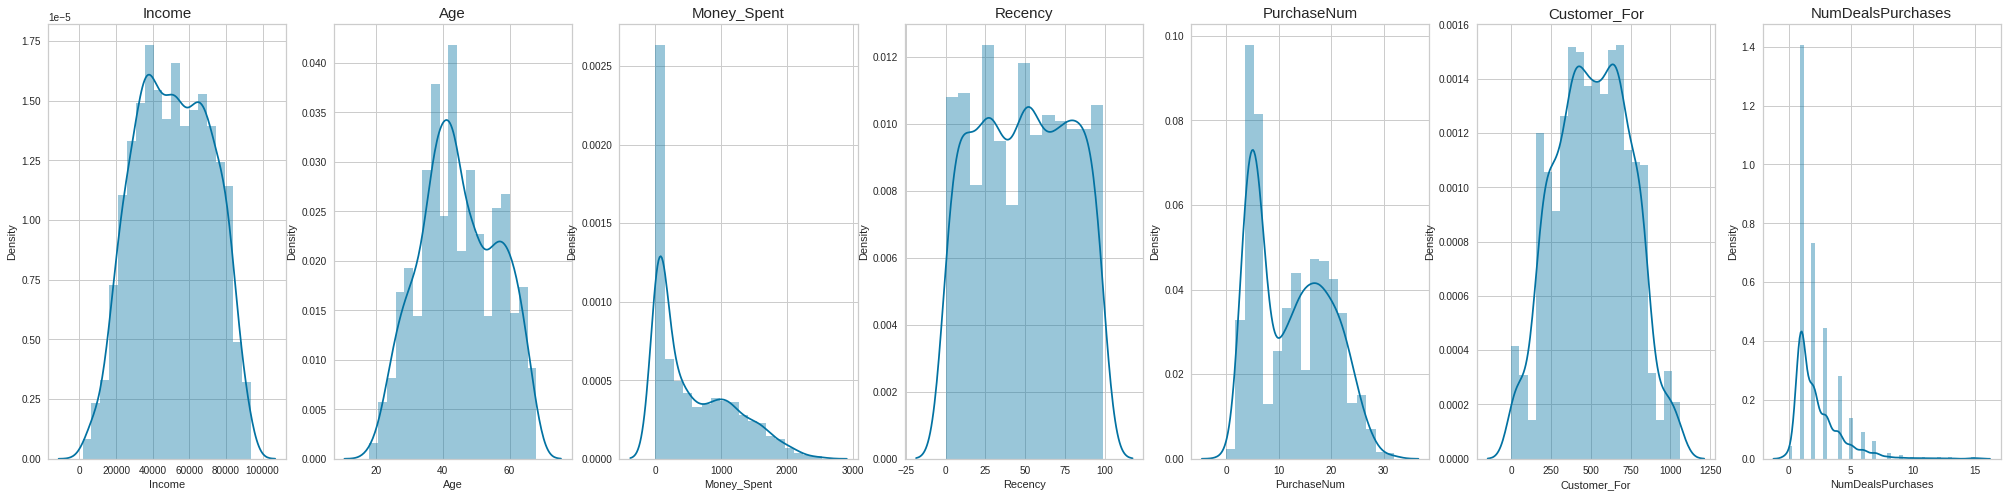

In [23]:
cols_to_plot.remove("Children")

plt.figure(figsize=(35, 8))

i = 1
for col in cols_to_plot:
    plt.subplot(1, 7, i)
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    i = i + 1

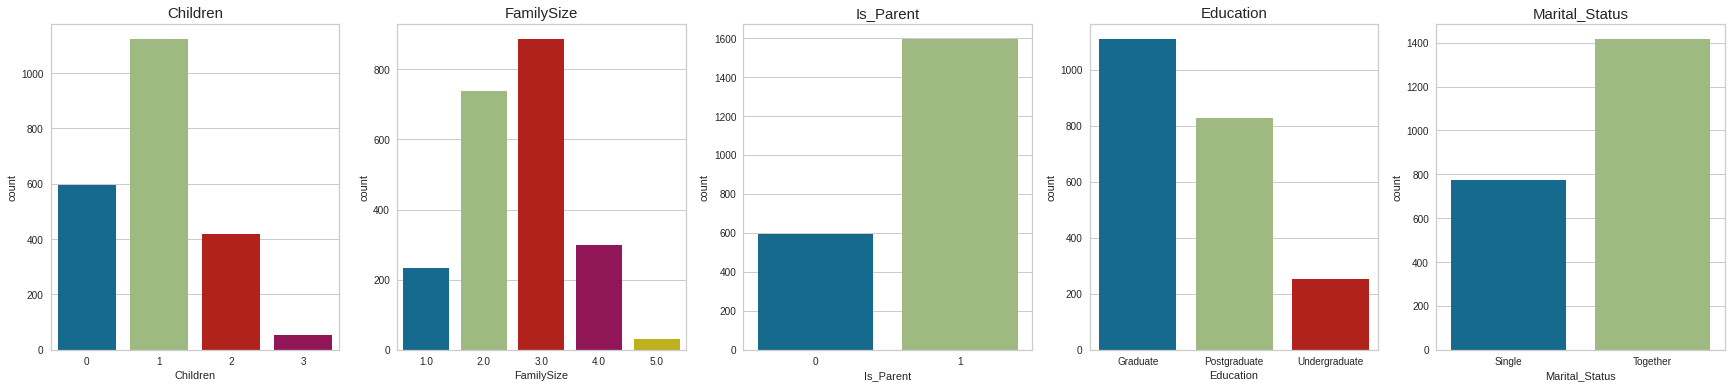

In [24]:
plt.figure(figsize=(30,6))

plt.subplot(1, 5, 1)
sns.countplot(df["Children"])
plt.title("Children", size=15)

plt.subplot(1, 5, 2)
sns.countplot(df["FamilySize"])
plt.title("FamilySize", size=15)

plt.subplot(1, 5, 3)
sns.countplot(df["Is_Parent"])
plt.title("Is_Parent", size=15)

plt.subplot(1, 5, 4)
sns.countplot(df["Education"])
plt.title("Education", size=15)

plt.subplot(1, 5, 5)
sns.countplot(df["Marital_Status"])
plt.title("Marital_Status", size=15);

***Visualizing the linear correlations between variables using Heatmap Visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

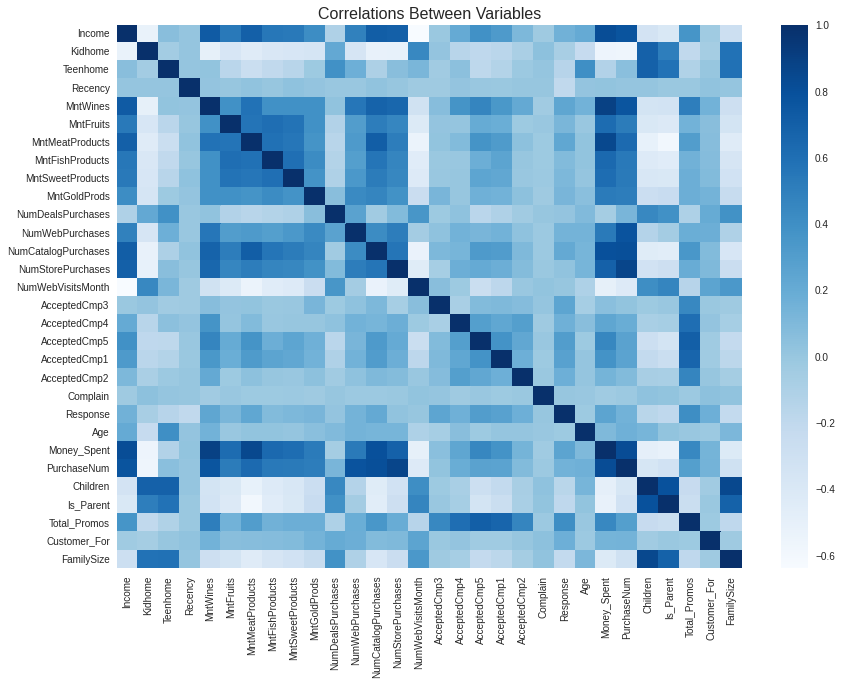

In [25]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# Data Preprocessing

In [26]:
df_ = df.copy()

# Transforming categorical features to numerical

df_['Education'] = df['Education'].map({'Undergraduate' : 0,
                                       'Graduate' : 0.5,
                                       'Postgraduate' : 1})

df_['Marital_Status'] = df['Marital_Status'].map({'Single' : 0 ,
                                                 'Together' : 1})

In [27]:
num_cols = ["Income", "Recency", 
            "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
            "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", 
            "Money_Spent", "PurchaseNum", "Age","Customer_For"]

sc = StandardScaler()
df_[num_cols] = sc.fit_transform(df_[num_cols])  # Scaling numerical columns using "Standard Scaler

In [28]:
# Dropping Promotions Accepted columns 

df_.drop(["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"],axis=1, inplace=True)

# Dimensionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

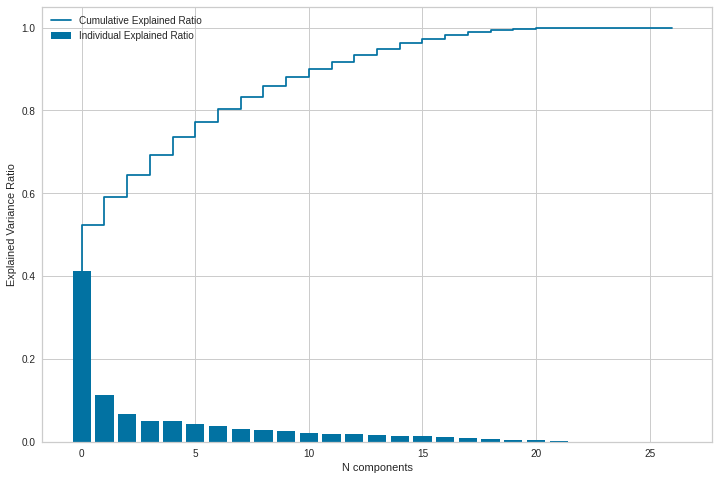

In [29]:
pca = PCA()
pca.fit(df_)

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

***From the graph we can see that taking N components 10 retains greater than 80% of the information present in data. Hence I opt for 10 components***

In [30]:
# Creating new Data Frame by reducing the no. of columns 

pca = PCA(n_components = 10)
pca.fit(df_)

df_pca = pd.DataFrame(pca.transform(df_), columns=["col1", "col2", "col3" , "col4", "col5", "col6" , "col7", "col8", "col9" , "col10"])
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

85.89061530582671


# Clustering

***As for the cluster number, we should choose the number of clusters where the elbow is breaking most. But, we may not always be able to see that clearly so we just make use of KElbowVisualizer.***

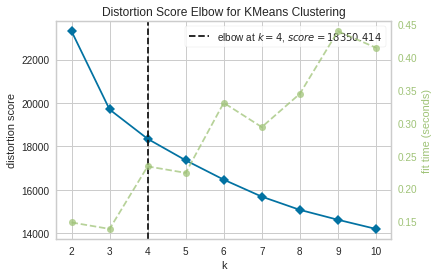

In [31]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(df_pca)
elbow_graph.show();

***It can be easily seen that the optimal value for "n_clusters" parameter is 4. Afterwards, we get to the part of clustering.***

In [32]:
# Segmenting Customers data to 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(df_pca)

df["Clusters"] = predictions

# Customer Personality Analysis

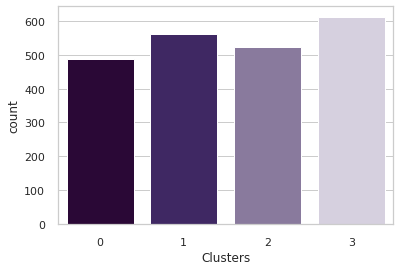

In [33]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

sns.countplot(df['Clusters'],palette=pal);

**Observations:**

* Cluster 3 has highest no. of values
* Cluster that less values compared to other clusters is Cluster 0

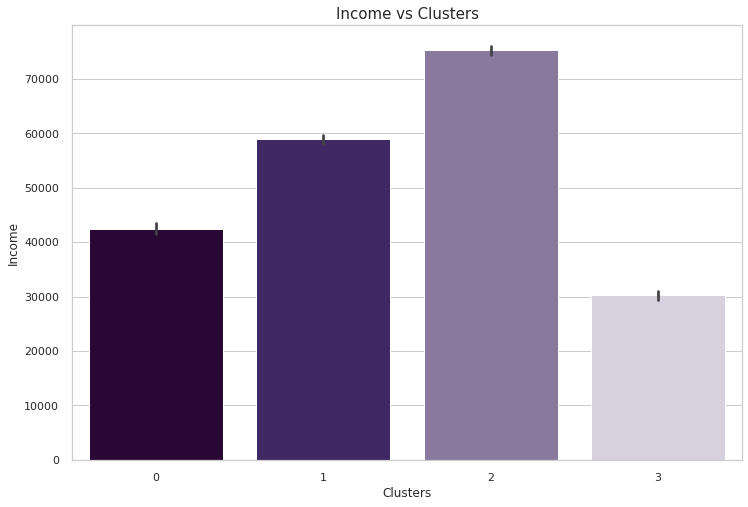

In [34]:
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]

plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"], palette=pal)
plt.title("Income vs Clusters", size=15)
plt.show()

**Observations:**

* The cluster which has the highest income is Cluster 2
* Income of Cluster 3 is relatively lower than incomes of other clusters

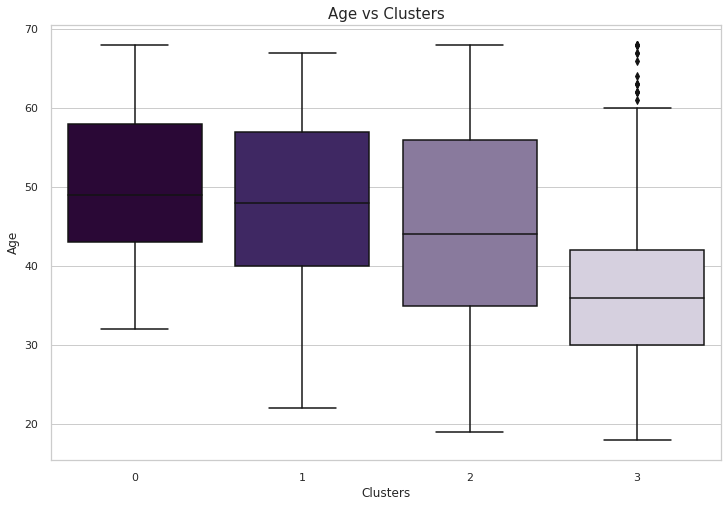

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["Age"], palette=pal)
plt.title("Age vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 3 includes youngest people (30-42)
* The oldest cluster is Cluster 0 (43-58)

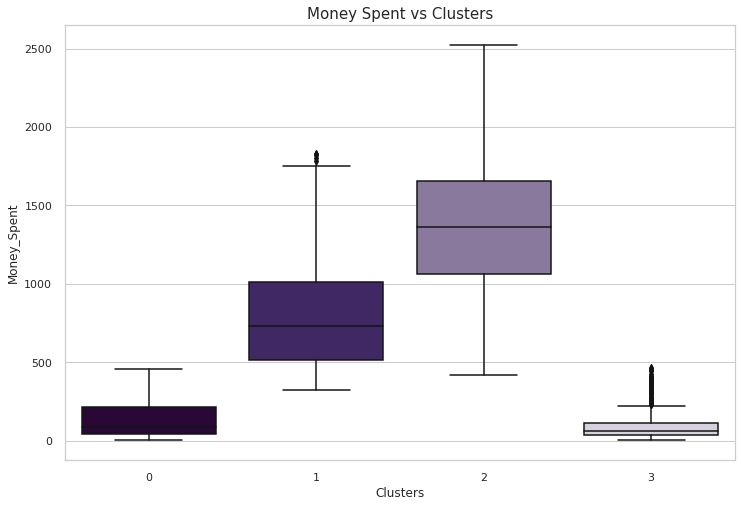

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["Money_Spent"], palette=pal)
plt.title("Money Spent vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 3 is spending the least money
* Cluster 2 is the cluster that spends the most money among other clusters

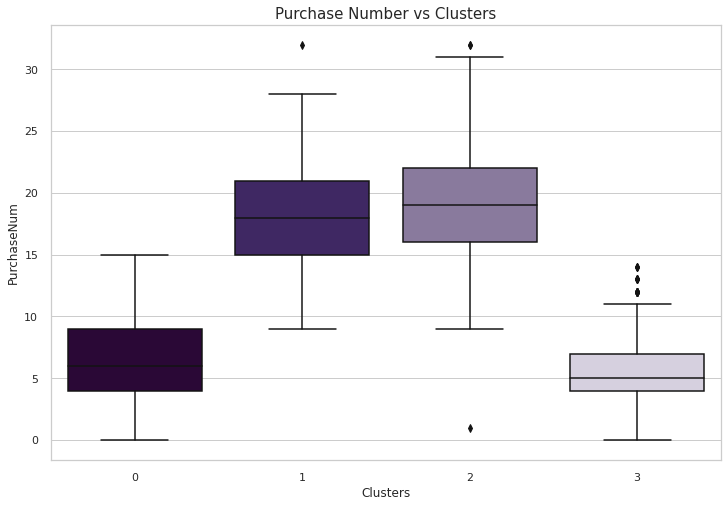

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["PurchaseNum"], palette=pal)
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 2 has the highest purchase number
* Cluster 3 does the least shopping

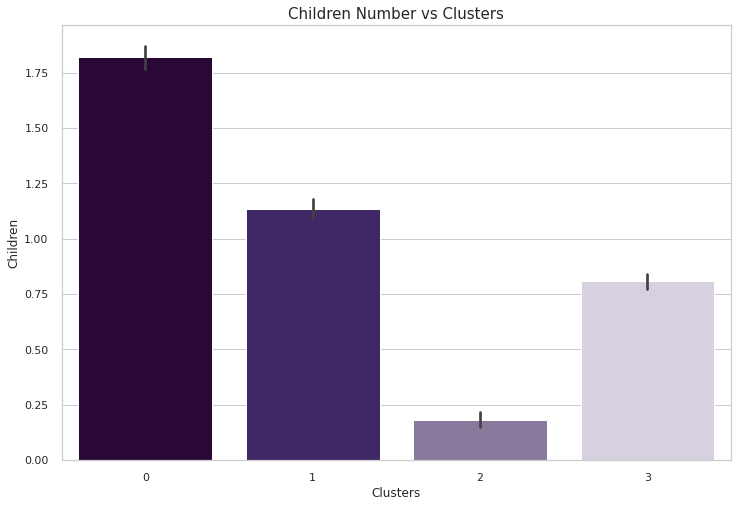

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Children"], palette=pal)
plt.title("Children Number vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 2 has nearly no child
* Cluster 0 has the most children among other clusters

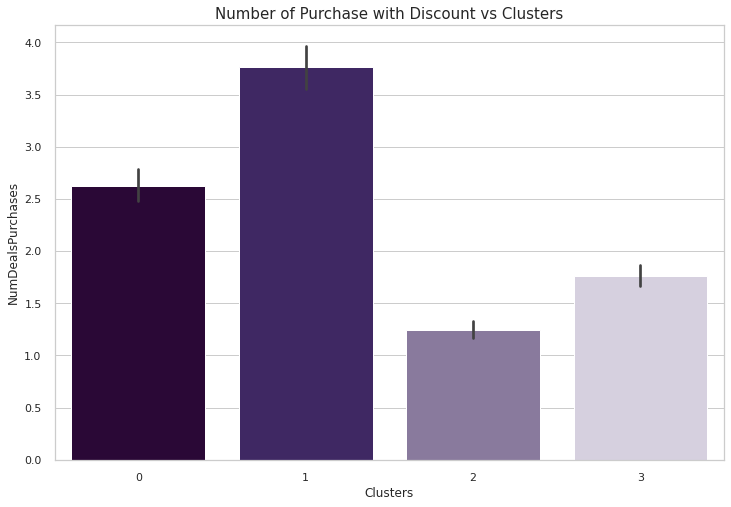

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["NumDealsPurchases"], palette=pal)
plt.title("Number of Purchase with Discount vs Clusters", size=15)
plt.show()

**Observations:**

* Cluster 2 benefits least from the discounts
* Cluster 1 has the highest number of purchase with discount

# Conclusion

**Cluster 0:**
* Is the oldest cluster
* Less no. of the customers for the company are from this cluster
* Has most children


**Cluster 1:**
* Is the cluster that shops most when there is a discount
* Has the second highest income


**Cluster 2:**
* Has the highest income
* Spends the most money
* Has the highest purchase number (shop-lover)
* Has the least number of children
* Is the one that benefits least from discounts

**Cluster 3:**

* Most of the customers for the company are from this cluster
* Is least-earner
* Is the youngest cluster
* Has a tendecy to spend less money
* Has least purchase number (shop-hater)

